In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset = r"C:\Users\mohit\OneDrive\Desktop\Upgrad\Mask Detection using Transfer Learning\Mask Dataset"

imagePaths = list(paths.list_images(dataset))

In [4]:
imagePaths

['C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\0.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\1.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\10.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\100.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\101.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\102.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\104.jpg',
 'C:\\Users\\mohit\\OneDrive\\Desktop\\Upgrad\\Mask Detection using Transfer Learning\\Mask Dataset\\without_mask\\105.jpg',
 'C:\

In [5]:
data = []
labels = []

for i in imagePaths:
    label = i.split(os.path.sep)[-2]
    labels.append(label)
    image = load_img(i,target_size = (224,224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

In [6]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [7]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [8]:
data = np.array(data, dtype = "float32")
labels = np.array(labels)

In [9]:
data.shape

(1376, 224, 224, 3)

In [10]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [11]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [12]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(data, labels, test_size = 0.20, stratify = labels, random_state = 10)

In [14]:
train_X.shape

(1100, 224, 224, 3)

In [15]:
train_Y.shape

(1100, 2)

In [16]:
test_X.shape

(276, 224, 224, 3)

In [18]:
test_Y.shape

(276, 2)

In [19]:
aug = ImageDataGenerator(rotation_range = 20,
                         zoom_range = 0.15,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         shear_range = 0.15,
                         horizontal_flip = True,
                         vertical_flip = True,
                         fill_mode = "nearest")

In [20]:
baseModel = MobileNetV2(weights = "imagenet", 
                        include_top = False, 
                        input_tensor = Input(shape = (224, 224, 3)))

9412608/9406464 [==============================] - 55s 6us/step


In [21]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [22]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (7, 7))(headModel)
headModel = Flatten(name = "Flatten")(headModel)
headModel = Dense(128, activation = "relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation = "softmax")(headModel)

model = Model(inputs = baseModel.input, outputs = headModel)

In [23]:
for layer in baseModel.layers:
    layer.trainable = False

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [26]:
learning_rate = 0.001
Epochs = 20
BS = 12

opt = Adam(lr = learning_rate, decay = learning_rate / Epochs)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ["accuracy"])

H = model.fit(
    aug.flow(train_X, train_Y, batch_size = BS),
    steps_per_epoch = len(train_X) // BS,
    validation_data = (test_X, test_Y),
    validation_steps = len(test_X) // BS,
    epochs = Epochs
)

model.save(r"C:\Users\mohit\OneDrive\Desktop\Upgrad\Mask Detection using Transfer Learning\mobilenet_v2.model")

C:\Users\mohit\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
91/91 [==============================] - 63s 588ms/step - loss: 0.2263 - accuracy: 0.9072 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 2/20
91/91 [==============================] - 53s 582ms/step - loss: 0.0872 - accuracy: 0.9706 - val_loss: 0.0350 - val_accuracy: 0.9819
Epoch 3/20
91/91 [==============================] - 49s 540ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0449 - val_accuracy: 0.9819
Epoch 4/20
91/91 [==============================] - 50s 549ms/step - loss: 0.0454 - accuracy: 0.9844 - val_loss: 0.0405 - val_accuracy: 0.9855
Epoch 5/20
91/91 [==============================] - 48s 522ms/step - loss: 0.0451 - accuracy: 0.9844 - val_loss: 0.0409 - val_accuracy: 0.9819
Epoch 6/20
91/91 [==============================] - 60s 659ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0537 - val_accuracy: 0.9783
Epoch 7/20
91/91 [==============================] - 50s 547ms/step - loss: 0.0340 - accuracy: 0.9871 - val_loss: 0.0515 - val_accuracy: 0.9783

C:\Users\mohit\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:\Users\mohit\OneDrive\Desktop\Upgrad\Mask Detection using Transfer Learning\mobilenet_v2.model\assets


In [27]:
predict = model.predict(test_X, batch_size = BS)
predict = np.argmax(predict, axis = 1)
print(classification_report(test_Y.argmax(axis = 1), predict, target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.98       138
without_mask       0.99      0.98      0.98       138

    accuracy                           0.98       276
   macro avg       0.98      0.98      0.98       276
weighted avg       0.98      0.98      0.98       276



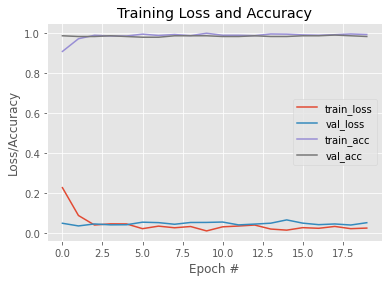

In [38]:
# plot the training loss and accuracy

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label = "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "right")
plt.savefig(r"C:\Users\mohit\OneDrive\Desktop\Upgrad\Mask Detection using Transfer Learning\plot_v2.png")